In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load the dataset
df = pd.read_csv('/content/sample_data/marketing_AB.csv')


In [3]:
# --- Data Preparation & Exploration ---

# Check the first rows and column names
print("First few rows:")
print(df.head())
print("\nColumn Names:")
print(df.columns.tolist())


First few rows:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  

Column Names:
['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']


In [6]:
# Convert the 'converted' column to boolean if it is not already
# (assumed to be stored as string 'True'/'False' or similar in some cases)
if df['converted'].dtype != bool:
    df['converted'] = df['converted'].astype(bool)
    print(df)

In [7]:
# Check basic statistics for conversion by test group
conversion_by_group = df.groupby('test group')['converted'].agg(['count', 'mean', 'sum'])
print("\nConversion rates by test group:")
print(conversion_by_group)


Conversion rates by test group:
             count      mean    sum
test group                         
ad          564577  0.025547  14423
psa          23524  0.017854    420


<ipython-input-9-f14c958f77fd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='test group', y='converted', data=df, ci=95)


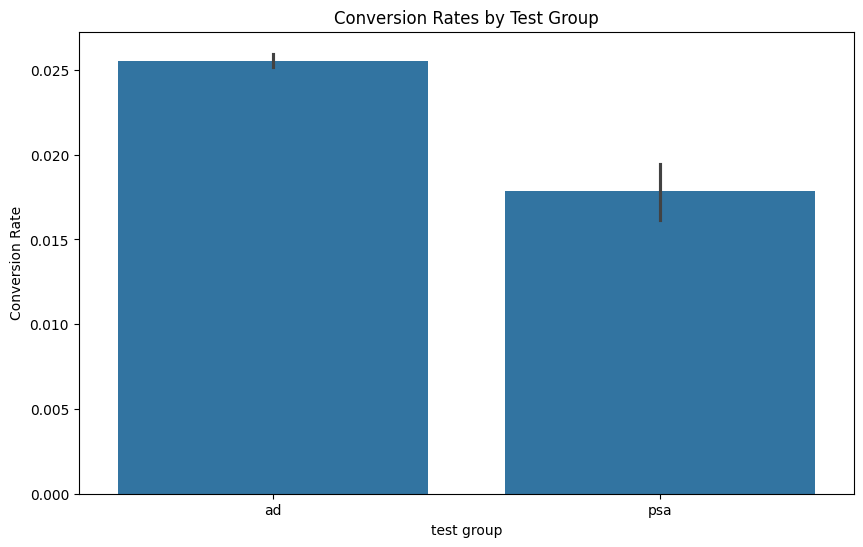

In [9]:
# Plot conversion rates by test group with 95% confidence intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='test group', y='converted', data=df, ci=95)
plt.title('Conversion Rates by Test Group')
plt.ylabel('Conversion Rate')
plt.show()

In [10]:
# Display the total number of users in each test group
group_sizes = df['test group'].value_counts()
print("\nNumber of users in each group:")
print(group_sizes)



Number of users in each group:
test group
ad     564577
psa     23524
Name: count, dtype: int64


In [11]:
# --- Revenue Estimation ---

# Assumption: each conversion generates a fixed revenue (eg., $100 per conversion)
assumed_revenue_per_conversion = 100


In [12]:
# Compute revenue for each group
conversion_by_group["estimated_revenue"] = conversion_by_group["sum"] * assumed_revenue_per_conversion
print("\nEstimated Revenue by test group (assuming $100 per conversion):")
print(conversion_by_group[['sum', 'estimated_revenue']])


Estimated Revenue by test group (assuming $100 per conversion):
              sum  estimated_revenue
test group                          
ad          14423            1442300
psa           420              42000


In [13]:
# --- Hypothesis Testing (Chi-square test) ---

# We compare the conversion success between 'ad' (experimental) and 'psa' (control).
# Construct a contingency table:
#   Rows: test groups; Columns: conversion (converted vs not converted)

# Calculate counts of conversions and non-conversions for each group
ct = pd.crosstab(df["test group"], df["converted"])
print("\nContingency Table for Test Groups and Conversions:")
print(ct)


Contingency Table for Test Groups and Conversions:
converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [14]:
# Perform the chi-square test on the contingency table.
chi2, p_value, dof, expected = stats.chi2_contingency(ct)
print("\nChi-square Test Results:")
print("Chi-square statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)


Chi-square Test Results:
Chi-square statistic: 54.005823883685245
Degrees of Freedom: 1
P-value: 1.9989623063390075e-13


In [15]:
# Interpretation: Typically, a p-value < 0.05 indicates a statistically significant difference in conversion rates.
if p_value < 0.05:
    print("\nThe result is statistically significant (p < 0.05).")
else:
    print("\nThe result is not statistically significant (p >= 0.05).")


The result is statistically significant (p < 0.05).
